In [1]:
import tweepy
import pandas as pd
import json
from timeit import default_timer as timer
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## Gather

### WeRateDogs Twitter Archive from CSV

In [2]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

### Retweet Counts and Favorite Counts from Twitter API

In [13]:
count = 0
fails_dict = {}
start = timer()
with open ('tweet.json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078:

Fail
1319: 706538006853918722
Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352:

Fail
1593: 686394059078897668
Fail
1594: 686386521809772549
Fail
1595: 686377065986265092
Fail
1596: 686358356425093120
Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Fail
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
1617: 685198997565345792
Fail
1618: 685169283572338688
Fail
1619: 684969860808454144
Fail
1620: 684959798585110529
Fail
1621: 684940049151070208
Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626:

Fail
1867: 675349384339542016
Fail
1868: 675334060156301312
Fail
1869: 675166823650848770
Fail
1870: 675153376133427200
Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Fail
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
Fail
1889: 674781762103414784
Fail
1890: 674774481756377088
Fail
1891: 674767892831932416
Fail
1892: 674764817387900928
Fail
1893: 674754018082705410
Fail
1894: 674752233200820224
Fail
1895: 674743008475090944
Fail
1896: 674742531037511680
Fail
1897: 674739953134403584
Fail
1898: 674737130913071104
Fail
1899: 674690135443775488
Fail
1900:

Fail
2141: 670003130994700288
Fail
2142: 669993076832759809
Fail
2143: 669972011175813120
Fail
2144: 669970042633789440
Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164: 669375718304980992
Fail
2165: 669371483794317312
Fail
2166: 669367896104181761
Fail
2167: 669363888236994561
Fail
2168: 669359674819481600
Fail
2169: 669354382627049472
Fail
2170: 669353438988365824
Fail
2171: 669351434509529089
Fail
2172: 669328503091937280
Fail
2173: 669327207240699904
Fail
2174:

In [3]:
selected_attr = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id' : json_data['id'],
                              'favorites': 
json_data['favorite_count'],
                             'retweets': 
json_data['retweet_count'],
                             'timestamp':
json_data['created_at']})
        
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id', 'favorites', 'retweets', 'timestamp'])

In [4]:
tweet_selected_attr

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,34718,7258,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30084,5434,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22640,3583,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,37993,7462,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36275,8014,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
872,759159934323924993,0,1107,Fri Jul 29 22:53:27 +0000 2016
873,759099523532779520,13998,3952,Fri Jul 29 18:53:24 +0000 2016
874,759047813560868866,6252,1910,Fri Jul 29 15:27:55 +0000 2016
875,758854675097526272,3421,865,Fri Jul 29 02:40:28 +0000 2016


### Tweet Image Predictions from TSV file 

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess

#### WeRateDogs Twitter Archive visual assessment

In [8]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### WeRateDogs Twitter Archive programmatic assessment

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [69]:
df.name.sample()

2311    a
Name: name, dtype: object

In [70]:
mask = df.name.str.contains('^[a-z]', regex = True)
df[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

#### Retweet Counts and Favorite Counts from Twitter API visual assessment

In [14]:
tweet_selected_attr.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,34718,7258,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30084,5434,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22640,3583,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,37993,7462,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36275,8014,Sat Jul 29 16:00:24 +0000 2017


#### Retweet Counts and Favorite Counts from Twitter API programmatic assessment

In [13]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   877 non-null    int64 
 1   favorites  877 non-null    int64 
 2   retweets   877 non-null    int64 
 3   timestamp  877 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.5+ KB


#### Tweet Image Predictions from TSV file visual assessment

In [48]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Tweet Image Predictions from TSV file programmatic assessment

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues

WeRateDogs Twitter Archive (dataframe 'df'):
- Retweet and Reply tweets rows included in dataframe (should just be original tweets with images).
- 'None' values instead of NaN for 'doggo,' 'floofer', 'pupper', and 'puppo'
- Source should be a category and could be simpler to read (Iphone, Vine, Twitter Website, and TweetDeck)
- Tweet_id should be an object not an integer 
- Rating numerator and denominator should be floats not integers  
- Dog names include nonsensical names (i.e. "a", "the", "such")

Tweet Image Predictions (dataframe 'image_prediction'): 
- Should show prediction columns as a categorical data type 

Retweet Counts and Favorite Counts from Twitter API (dataframe 'tweet_selected_attr'):
- retweets and favorites should be integers not floats


### Tidiness Issues

WeRateDogs Twitter Archive (in dataframe 'df"):
- 'doggo', 'floofer', 'pupper,' 'puppo' should be described in 1 column. 
- Should show numerator and denominator together in one column (as one variable: score) 

Tweet Image Predictions (dataframe 'image_prediction'):
- Predictions for tweets should be combined into the WeRateDogs Twitter Archive dataframe

Retweet Counts and Favorite Counts from Twitter API (dataframe 'tweet_selected_attr'):
- Retweet counts and favorite counts should be comibined into the WeRateDogs Twitter Archive dataframe

## Clean

### Missing Data

#### `WeRateDogs Twitter Archive`: 'df' includes retweet and reply tweet rows (should just be originals with images)

##### Define

Remove retweet and reply rows from the WeRateDogs Twitter archive `df` using Pandas isnull() function

##### Code

In [6]:
df_clean = df.copy()

In [7]:
df_clean = df[df.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]
df_clean = df_clean[df_clean.in_reply_to_user_id.isnull()]

In [8]:
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Tidiness Issues

#### `Tweet Image Predictions`: Predictions for tweets should be combined into the WeRateDogs Twitter Archive dataframe.

##### Define

Create a merged dataframe called `df_combined` that includes tweets that have an image prediction

##### Code

In [10]:
image_prediction_clean = image_prediction.copy()

In [11]:
df_combined= pd.merge(df_clean,image_prediction_clean,on=['tweet_id'],how='inner')

##### Test

In [12]:
df_combined

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### `Retweet Counts and Favorite Counts from Twitter API` (dataframe 'tweet_selected_attr'): Retweet counts and favorite counts should be comibined into the WeRateDogs Twitter Archive dataframe (now `df_combined`)

##### Define

Use Pandas merge() to combine `tweet_selected_attributes` with `df_combined` and drop extra timestamp column using Pandas drop()

##### Code

In [13]:
tweet_selected_attr_clean = tweet_selected_attr.copy()

In [14]:
df_combined_2 = pd.merge(df_combined,tweet_selected_attr_clean,on=['tweet_id'],how='inner')

In [15]:
df_combined_2.drop(columns=['timestamp_y'], axis=1, inplace=True)

In [16]:
df_combined_2.rename(columns={'timestamp_x' : 'timestamp'},inplace=True) 

##### Test

In [17]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            651 non-null    int64  
 1   timestamp           651 non-null    object 
 2   source              651 non-null    object 
 3   text                651 non-null    object 
 4   expanded_urls       651 non-null    object 
 5   rating_numerator    651 non-null    int64  
 6   rating_denominator  651 non-null    int64  
 7   name                651 non-null    object 
 8   doggo               651 non-null    object 
 9   floofer             651 non-null    object 
 10  pupper              651 non-null    object 
 11  puppo               651 non-null    object 
 12  jpg_url             651 non-null    object 
 13  img_num             651 non-null    int64  
 14  p1                  651 non-null    object 
 15  p1_conf             651 non-null    float64
 16  p1_dog  

#### `WeRateDogs Twitter Archive` (now in dataframe `df_combined_2`): 'doggo', 'floofer', 'pupper,' 'puppo' should be  in one column, and 'None' values should be NaN

##### Define

Replace 'None' with an empty space using Pandas replace(), then create combined 'dog_stage' column indicating whether a tweet includes a 'pupper,' 'doggo', 'puppo', 'foofer' or combination thereof and separate entries with multiple designations using a comma, then replace all empty spaces with NaN using Numpy's .nan

##### Code

In [18]:
df_combined_2.doggo.replace('None', '', inplace=True)
df_combined_2.floofer.replace('None', '', inplace=True)
df_combined_2.pupper.replace('None', '', inplace=True)
df_combined_2.puppo.replace('None', '', inplace=True)

In [19]:
df_combined_2['dog_stage'] = df_combined_2.doggo + df_combined_2.floofer + df_combined_2.pupper + df_combined_2.puppo

In [20]:
df_combined_2.loc[df_combined_2.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_combined_2.loc[df_combined_2.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_combined_2.loc[df_combined_2.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [21]:
df_combined_2.loc[df_combined_2.dog_stage == '', 'dog_stage'] = np.nan

In [22]:
df_combined_2.drop(columns=['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

##### Test

In [23]:
df_combined_2.dog_stage.value_counts()

doggo             44
pupper            37
puppo             16
doggo, pupper      5
floofer            3
doggo, floofer     1
doggo, puppo       1
Name: dog_stage, dtype: int64

#### `WeRateDogs Twitter Archive` (now in dataframe `df_combined_2`): Numerator and denominator columns should be float datatypes, should show numerator and denominator together in one column (as one variable: score).

##### Define

Correctly extract the ratings that have decimals using a regex, hange numerator rating and denominator rating to float using astype(), create a new column 'score' with both numerator and denominator, and drop old numerator rating and denominator rating columns

##### Code

In [24]:
rating = df_combined_2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [25]:
df_combined_2.rating_numerator = df_combined_2.rating_numerator.astype('float')

In [26]:
df_combined_2.rating_denominator = df_combined_2.rating_denominator.astype('float')

In [27]:
df_combined_2['score'] = df_combined_2.rating_numerator / df_combined_2.rating_denominator

In [28]:
df_combined_2.drop(columns=['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Test

In [29]:
df_combined_2.score.value_counts()

1.200000    244
1.300000    203
1.100000    122
1.000000     38
1.400000     30
0.800000      2
0.500000      2
0.700000      2
0.000000      1
0.400000      1
7.500000      1
3.428571      1
0.900000      1
0.600000      1
2.700000      1
0.300000      1
Name: score, dtype: int64

In [30]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       651 non-null    int64  
 1   timestamp      651 non-null    object 
 2   source         651 non-null    object 
 3   text           651 non-null    object 
 4   expanded_urls  651 non-null    object 
 5   name           651 non-null    object 
 6   jpg_url        651 non-null    object 
 7   img_num        651 non-null    int64  
 8   p1             651 non-null    object 
 9   p1_conf        651 non-null    float64
 10  p1_dog         651 non-null    bool   
 11  p2             651 non-null    object 
 12  p2_conf        651 non-null    float64
 13  p2_dog         651 non-null    bool   
 14  p3             651 non-null    object 
 15  p3_conf        651 non-null    float64
 16  p3_dog         651 non-null    bool   
 17  favorites      651 non-null    int64  
 18  retweets  

### Quality Issues

#### `Tweet Image Predictions` (now in dataframe df_combined_2): Predictions should be a categorical data type

##### Define

Change the 'p1' column to category dataype using Pandas astype() and change column names from 'img_num', 'p1,' 'p1_conf', 'p1_dog' to clearer 'image_number', 'prediction', 'prediction_confidence', and 'prediction_is_dog' using Pandas rename(), drop prediction columns not in use

##### Code

In [36]:
list(df_combined_2.p1)

['Chihuahua',
 'Chihuahua',
 'basset',
 'Chesapeake_Bay_retriever',
 'Appenzeller',
 'Pomeranian',
 'Irish_terrier',
 'Pembroke',
 'Samoyed',
 'French_bulldog',
 'Pembroke',
 'French_bulldog',
 'golden_retriever',
 'whippet',
 'golden_retriever',
 'golden_retriever',
 'Siberian_husky',
 'French_bulldog',
 'basset',
 'Pembroke',
 'Mexican_hairless',
 'Samoyed',
 'Chihuahua',
 'kuvasz',
 'French_bulldog',
 'pug',
 'Blenheim_spaniel',
 'pug',
 'malamute',
 'Italian_greyhound',
 'chow',
 'pug',
 'Pembroke',
 'German_shepherd',
 'Doberman',
 'golden_retriever',
 'chow',
 'golden_retriever',
 'Eskimo_dog',
 'Labrador_retriever',
 'Pembroke',
 'golden_retriever',
 'Weimaraner',
 'Saluki',
 'Samoyed',
 'Pembroke',
 'golden_retriever',
 'Chihuahua',
 'miniature_pinscher',
 'basset',
 'German_short-haired_pointer',
 'English_springer',
 'vizsla',
 'Italian_greyhound',
 'basset',
 'French_bulldog',
 'Chesapeake_Bay_retriever',
 'basset',
 'Saluki',
 'Pembroke',
 'bloodhound',
 'golden_retriever',

In [31]:
df_combined_2.p1 = df_combined_2.p1.astype('category')


In [32]:
df_combined_2.rename(columns={'img_num' : 'image_number', 'p1' : 'prediction', 'p1_conf' : 'prediction_confidence', 'p1_dog' : 'prediction_is_dog'}, inplace=True)

In [33]:
df_combined_2.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1, inplace=True)

##### Test

In [34]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               651 non-null    int64   
 1   timestamp              651 non-null    object  
 2   source                 651 non-null    object  
 3   text                   651 non-null    object  
 4   expanded_urls          651 non-null    object  
 5   name                   651 non-null    object  
 6   jpg_url                651 non-null    object  
 7   image_number           651 non-null    int64   
 8   prediction             651 non-null    category
 9   prediction_confidence  651 non-null    float64 
 10  prediction_is_dog      651 non-null    bool    
 11  favorites              651 non-null    int64   
 12  retweets               651 non-null    int64   
 13  dog_stage              107 non-null    object  
 14  score                  651 non-null    flo

#### `WeRateDogs Twitter Archive` (now in dataframe df_combined_2): Source should be a category and simpler to read

##### Define

Use Pandas replace() to replace source column values to 'Twitter_for_iPhone' and 'Twitter_Web_Client' and use Pandas astype() to turn the values in the source column to a category datatype

##### Code

In [35]:
df_combined_2['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter_for_iPhone', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter_Web_Client'},inplace=True)

In [36]:
df_combined_2.source = df_combined_2.source.astype('category')

##### Test

In [37]:
df_combined_2.source.value_counts()

Twitter_for_iPhone    645
Twitter_Web_Client      6
Name: source, dtype: int64

In [38]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               651 non-null    int64   
 1   timestamp              651 non-null    object  
 2   source                 651 non-null    category
 3   text                   651 non-null    object  
 4   expanded_urls          651 non-null    object  
 5   name                   651 non-null    object  
 6   jpg_url                651 non-null    object  
 7   image_number           651 non-null    int64   
 8   prediction             651 non-null    category
 9   prediction_confidence  651 non-null    float64 
 10  prediction_is_dog      651 non-null    bool    
 11  favorites              651 non-null    int64   
 12  retweets               651 non-null    int64   
 13  dog_stage              107 non-null    object  
 14  score                  651 non-null    flo

#### `WeRateDogs Twitter Archive` (now in dataframe df_combined_2): tweet_id should be an object not an integer

##### Define

Use astype() to change the tweet_id datatype from integer to object

##### Code

In [39]:
df_combined_2.tweet_id = df_combined_2.tweet_id.astype('object')

##### Test

In [40]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               651 non-null    object  
 1   timestamp              651 non-null    object  
 2   source                 651 non-null    category
 3   text                   651 non-null    object  
 4   expanded_urls          651 non-null    object  
 5   name                   651 non-null    object  
 6   jpg_url                651 non-null    object  
 7   image_number           651 non-null    int64   
 8   prediction             651 non-null    category
 9   prediction_confidence  651 non-null    float64 
 10  prediction_is_dog      651 non-null    bool    
 11  favorites              651 non-null    int64   
 12  retweets               651 non-null    int64   
 13  dog_stage              107 non-null    object  
 14  score                  651 non-null    flo

#### `Retweet Counts and Favorite Counts from Twitter API` (now in dataframe df_combined_2): retweets and favorites should be integers not floats

##### Define

Use astype() to change retweet_count and favorite_count to integer datatype

##### Code

In [41]:
df_combined_2.retweets = df_combined_2.retweets.astype('int64')

In [42]:
df_combined_2.favorites = df_combined_2.favorites.astype('int64')

##### Test

In [43]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               651 non-null    object  
 1   timestamp              651 non-null    object  
 2   source                 651 non-null    category
 3   text                   651 non-null    object  
 4   expanded_urls          651 non-null    object  
 5   name                   651 non-null    object  
 6   jpg_url                651 non-null    object  
 7   image_number           651 non-null    int64   
 8   prediction             651 non-null    category
 9   prediction_confidence  651 non-null    float64 
 10  prediction_is_dog      651 non-null    bool    
 11  favorites              651 non-null    int64   
 12  retweets               651 non-null    int64   
 13  dog_stage              107 non-null    object  
 14  score                  651 non-null    flo

#### `WeRateDogs Twitter Archive` (now in dataframe df_combined_2): Dog names include nonsensical names (i.e. "a", "the", "such"

##### Define

Since the nonsensical names start with a lowercase letter, remove all rows for which name starts with a lowercase letter using index and str.islower()

##### Code

In [44]:
lower_dog_name_index = df_combined_2[df_combined_2.name.str.islower()].index

In [45]:
df_combined_2.drop(lower_dog_name_index, inplace=True)

##### Test

In [46]:
df_combined_2.shape

(641, 15)

## Store Clean DataFrame

In [47]:
df_combined_2.to_csv('twitter_archive_master.csv')

## Analyze and Visualize

### Relationship Between Score and Retweets

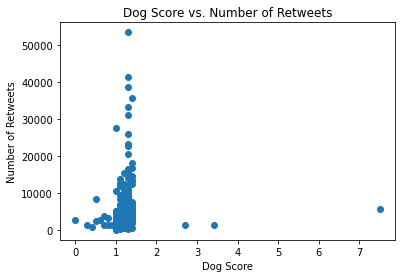

In [48]:
plt.scatter(df_combined_2['score'], df_combined_2['retweets'])
plt.title('Dog Score vs. Number of Retweets')
plt.xlabel('Dog Score')
plt.ylabel('Number of Retweets')
plt.show()

### 'Doggo' is the most frequent dog_stage in the dataset

In [49]:
df_combined_2.dog_stage.value_counts()

doggo             44
pupper            36
puppo             16
doggo, pupper      5
floofer            3
doggo, floofer     1
doggo, puppo       1
Name: dog_stage, dtype: int64

### The median tweet score is 1.2, which is similar to the mean score of 1.21

In [50]:
df_combined_2.score.describe()

count    641.000000
mean       1.214241
std        0.300225
min        0.000000
25%        1.100000
50%        1.200000
75%        1.300000
max        7.500000
Name: score, dtype: float64

### The most frequent predicted dog breed represented in the dataset is golden retriever

In [68]:
df_combined_2.prediction.value_counts()

golden_retriever      64
Pembroke              35
Labrador_retriever    34
Chihuahua             21
chow                  19
                      ..
cairn                  1
wooden_spoon           1
Madagascar_cat         0
limousine              0
Angora                 0
Name: prediction, Length: 187, dtype: int64